El texto de los autores Bell, Chety, Jaravel, Petkova, Reenen, busca abordar el tema de la innovación y el crecimiento económico, pero enfocando la atención en los individuos y desde el contexto de potenciales inventores/as. Este nuevo enfoque, permite ver qué factores son los que podrían favorecer a que una persona se convierta en inventor en los Estados Unidos, así como el rol que tiene el entorno al que se le ha expuesto durante su infancia, y sí es que este influye tanto o más que el talento propio. En ese sentido, la pregunta de investigación debería ser algo relacionado a ¿Cuáles son los factores más determinantes que dictaminan que un individuo se convierta en inventor en Estados Unidos?, lo cual pude ser especificado por medio de una pregunta secundaria ¿Qué impacto tienen los factores sociales /estructurales con los que un individuo en Estados Unidos crece, en la posibilidad de que este se convierta en un inventor?, así como ¿Qué tan importante es el talento innato en la posibilidad de seguir una carrera como inventor en los Estados Unidos?.

Una fortaleza que tiene este artículo, es que usa métodos cuantitativos, hasta cualitativos, correctos para responder la pregunta de investigación. Es decir, los autores logran confirmar que hay ciertas variables con un nivel alto de predictibilidad sobre la carrera de un posible inventor. Estas variables suelen ser las de clase social o ingresos económicos familiar, el color de piel y el sexo de la persona. Siendo el perfil del hombre blanco de clase acomodada o rica, el más predispuesto a optar por esta carrera y el que más ventajas tendría en términos comparativos. Asimismo, establece otra relación causal entre variables vinculadas al contexto, a la crianza y a las infancias,  y la posibilidad de seguir una carrera como inventor en EEUU. De manera que, las posibilidades de ser inventor aumentaban si es que la persona había sido expuesto a un entorno de tecnología en innovación, provenía de padres o familiares inventores, estudiaban en colegios de alto rendimiento, era influenciado o guiado por otros inventores/as,etc. Por lo que el texto logra su cometido de responder la pregunta principal y parte de la secundaria.

No obstante,  una debilidad del texto, es que no logra responder la otra pregunta secundaria vinculada al talento natural u oferta de innovación, ni  aborda otras variables internas. Lo cual si bien, no es fácil, ni obligatorio de desarrollar para el tipo de investigación, sí hubiera sido muy útil de incluir en la investigación. Aunque, también hay que rescatar que la metodología empleada de realizar regresiones de mínimos cuadrados fue bastante acertada para la predictibilidad y el tipo de variable a estudiar. 

En ese sentido, la contribución principal de los autores, sería la de sentar un precedente para entender la importancia que tienen los factores tanto exógenos como endógenos  en la elección de un rubro tan demandante como la innovación, y la de pensar hacia que factores se debe impulsar para fomentar la tecnología y la proliferación de inventores en un país . Asimismo, también los consejos sugeridos de brindar más cursos vinculados a la ciencia, matemática y tecnología para mejorar esta exposición temprana a la innovación; o impulsar programas de ayuda social o de becas a alumnos/as destacados/as en estas áreas para fomentar la carrera de jóvenes talentos en el mediano- largo plazo, deben de ser escuchados, pues provienen de una base empírica que probablemente haga la diferencia de ser apoyadas.  Finalmente, los siguientes pasos que podría realizarse sería tal vez intentar resolver la pregunta secundaria vinculada al talento innato. Tal vez incluir test que miden los tipos de inteligencia (lógico, matemática, social o emocional), y ver como los estudiantes que recibieron 

Regresión Discontinua

Explique de manera muy breve y resumida en qué consiste una regresión discontinua.

Es un modelo que investiga, analiza y compara dos grupos que se dividen por una discontinuidad o umbral que han estado siguiendo su rumbo natural antes de ser disrumpidos. Para ello este proceso debe ser no aleatorio y que estos grupos guarden ciertas similutes que solo puedan ser interrumpidas por la presencia de este evento o umbral. De esta manera, la comparacion de observaciones en ambos lados del umbral permite distinguir a los grupos de tratamiento, de los de control, la cual se da gracias a la manipulacion de la running variable dentro de los rangos que establece el umbral.

Detalle un ejemplo en la vida real en donde podría emplear una regresión discontinua.

Un caso al que pueda emplear este tip de modelo de regresión sería el caso del consumo de aves de corral antes y después de que el Gobierno central emitiera una alerta sanitaria sobre la gripe Aviar a nivel nacional. Así, se podría considerar la alerta sanitaria sobre la gripe aviar emitida por el gobierno hace unas semanas como el elemento disruptor, y el nivel de consumo de pollo o pavo antes y después de este suceso reciente, para evaluar si es que tuvo algún impacto real.

Explique el diseño Sharp Desing y comente un ejemplo en la vida real en donde podría aplicarlo (sea lo más detallado posible).

El sharp desging vendria ser que cuando se cruza la línea o el limite del umbral en una regresion discontinua,las posibilidades de pertenecer a un grupo de tratamiento pasan del 0 al 100% Y se convierten automaticamente como parte del grupo de control. Asi, si se quisiera medir el efecto que tiene el consumo de pescado en el crecimiento de un grupo especifico de niños de 10 años, podemos entender que el umbral fuera 1.60, y que todo aquel niño que pase esa talla, pertenecería automaticamente al grupo de control.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

Ejemplo 1
Y = 15 + 22D + 2.5X + E

In [2]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

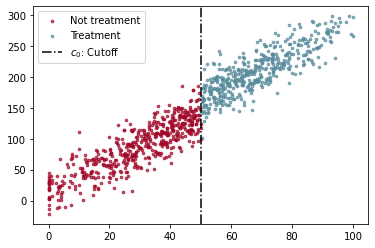

In [3]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [4]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

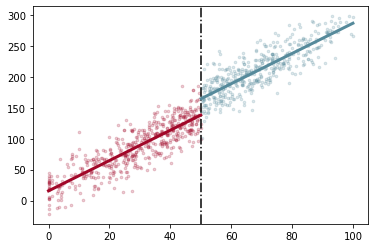

In [5]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [6]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 26.62


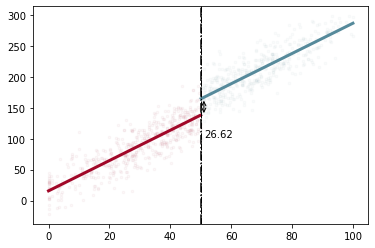

In [7]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));

Ejemplo 2
Y = 12 + 60D + 1.3X + E

In [8]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 12 + 60*dat.D + 1.3 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

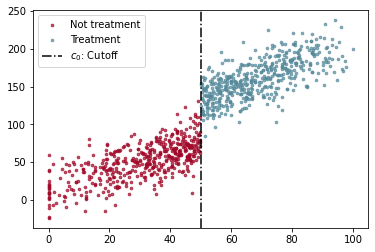

In [9]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [10]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

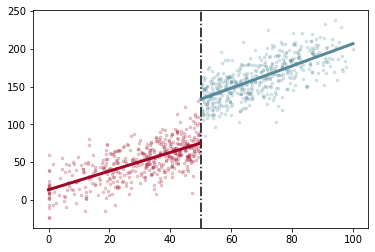

In [11]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);

In [12]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 58.32


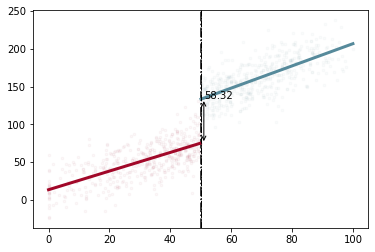

In [13]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));
